# Descripción del proyecto

Rusty Bargain es un servicio de venta de coches de segunda mano que está desarrollando una app para atraer a nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial, especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.

A Rusty Bargain le interesa:

* la calidad de la predicción
* la velocidad de la predicción
* el tiempo requerido para el entrenamiento

Instrucciones del proyecto

* Descarga y examina los datos.
* Entrena diferentes modelos con varios hiperparámetros (debes hacer al menos dos modelos diferentes, pero más es mejor. Recuerda, varias implementaciones de potenciación del gradiente no cuentan como modelos diferentes). El punto principal de este paso es comparar métodos de potenciación del gradiente con bosque aleatorio, árbol de decisión y regresión lineal.
* Analiza la velocidad y la calidad de los modelos.

Observaciones:

* Utiliza la métrica RECM para evaluar los modelos.
* La regresión lineal no es muy buena para el ajuste de hiperparámetros, pero es perfecta para hacer una prueba de cordura de otros métodos. Si la potenciación del gradiente funciona peor que la regresión lineal, definitivamente algo salió mal.
* Aprende por tu propia cuenta sobre la librería LightGBM y sus herramientas para crear modelos de potenciación del gradiente (gradient boosting).
* Idealmente, tu proyecto debe tener regresión lineal para una prueba de cordura, un algoritmo basado en árbol con ajuste de hiperparámetros (preferiblemente, bosque aleatorio), LightGBM con ajuste de hiperparámetros (prueba un par de conjuntos), y CatBoost y XGBoost con ajuste de hiperparámetros (opcional).
* Toma nota de la codificación de características categóricas para algoritmos simples. LightGBM y CatBoost tienen su implementación, pero XGBoost requiere OHE.

Puedes usar un comando especial para encontrar el tiempo de ejecución del código de celda en Jupyter Notebook. Encuentra ese comando.
Dado que el entrenamiento de un modelo de potenciación del gradiente puede llevar mucho tiempo, cambia solo algunos parámetros del modelo.

Si Jupyter Notebook deja de funcionar, elimina las variables excesivas por medio del operador del:

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

# Descripción de los datos

El dataset está almacenado en el archivo /datasets/car_data.csv. descargar dataset.

Características

+ DateCrawled — fecha en la que se descargó el perfil de la base de datos
+ VehicleType — tipo de carrocería del vehículo
+ RegistrationYear — año de matriculación del vehículo
+ Gearbox — tipo de caja de cambios
+ Power — potencia (CV)
+ Model — modelo del vehículo
+ Mileage — kilometraje (medido en km de acuerdo con las especificidades regionales del conjunto de datos)
+ RegistrationMonth — mes de matriculación del vehículo
+ FuelType — tipo de combustible
+ Brand — marca del vehículo
+ NotRepaired — vehículo con o sin reparación
+ DateCreated — fecha de creación del perfil
+ NumberOfPictures — número de fotos del vehículo
+ PostalCode — código postal del propietario del perfil (usuario)
+ LastSeen — fecha de la última vez que el usuario estuvo activo

Objetivo

+ Price — precio (en euros)

# Evaluación del proyecto

Hemos definido los criterios de evaluación para el proyecto. Léelos con atención antes de pasar al ejercicio.

Esto es en lo que se fijarán los revisores al examinar tu proyecto:

1. ¿Seguiste todos los pasos de las instrucciones?
2. ¿Cómo preparaste los datos?
3. ¿Qué modelos e hiperparámetros consideraste?
4. ¿Conseguiste evitar la duplicación del código?
5. ¿Cuáles son tus hallazgos?
6. ¿Mantuviste la estructura del proyecto?
7. ¿Mantuviste el código ordenado?

Ya tienes tus hojas informativas y los resúmenes de los capítulos, por lo que todo está listo para continuar con el proyecto.

## Examinar los datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor



In [6]:
def rename(data):
    '''
    Renombrar columnas: Bucle en los encabezados para :
    1. Poner todo en minúsculas
    2. Eliminar los espacios
    3. Remplazar espacio entre palabras por "_"
    '''
    new_col_names = []

    for name in data.columns:
        # Luego, pon todas las letras en minúsculas
        name_lowered = name.lower()
        # Elimina los espacios al principio y al final
        name_stripped = name_lowered.strip()
        # Por último, reemplaza los espacios entre palabras por guiones bajos
        name_no_spaces = name_stripped.replace(' ', '_')
        # Agrega el nuevo nombre a la lista de nuevos nombres de columna
        new_col_names.append(name_no_spaces)

    # Reemplaza los nombres anteriores por los nuevos
    data.columns = new_col_names

In [7]:
# mostrar información del DataFrame
def info(df):
    display(df.sample(10))
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    print('Duplicated: ',df.duplicated().sum())
    print()
    print('Null values %:')
    print(100*df.isnull().sum()/len(df))


In [2]:
df = pd.read_csv('./datasets/car_data.csv')

In [5]:
rename(df)

In [6]:
info(df)

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
99378,28/03/2016 23:40,4200,wagon,1998,manual,79,sprinter,150000,12,gasoline,mercedes_benz,no,28/03/2016 00:00,0,66271,30/03/2016 15:45
285378,25/03/2016 09:50,400,wagon,1997,manual,101,vectra,150000,6,petrol,opel,NaN,25/03/2016 00:00,0,57319,06/04/2016 08:46
169119,07/03/2016 11:51,3999,convertible,2001,manual,140,other,90000,5,petrol,toyota,no,07/03/2016 00:00,0,31582,07/04/2016 11:44
144413,21/03/2016 12:47,3100,convertible,1988,manual,90,golf,150000,2,petrol,volkswagen,no,21/03/2016 00:00,0,73240,29/03/2016 21:17
260831,14/03/2016 22:46,6700,wagon,2007,manual,140,golf,150000,10,gasoline,volkswagen,no,14/03/2016 00:00,0,99090,06/04/2016 18:18
74489,27/03/2016 19:56,950,wagon,1996,manual,90,laguna,150000,8,petrol,renault,no,27/03/2016 00:00,0,56761,05/04/2016 18:16
316808,28/03/2016 14:50,350,sedan,1995,manual,113,laguna,150000,11,petrol,renault,yes,28/03/2016 00:00,0,6667,06/04/2016 19:16
300210,04/04/2016 12:57,2599,sedan,2006,manual,75,colt,60000,2,petrol,mitsubishi,no,04/04/2016 00:00,0,63526,04/04/2016 13:44
279318,04/04/2016 21:40,16400,bus,2012,manual,109,b_klasse,70000,8,gasoline,mercedes_benz,no,04/04/2016 00:00,0,71134,07/04/2016 00:15
37268,12/03/2016 09:53,500,sedan,1996,manual,75,golf,150000,4,petrol,volkswagen,no,12/03/2016 00:00,0,29525,15/03/2016 13:16



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   mileage            354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  notrepaired        283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object

<div class="alert alert-block alert-info">
<b>

Observaciones:

1. Las columnas VehicleType, Gearbox, Model, FuelType, y NotRepaired contienen valores nulos significativos: 10.58%,  5.60%,  5.56%, 9.28% y 20.08% respectivamente.
2. La columna RegistrationYear tiene valores anómalos (mínimo de 1000 y máximo de 9999).
3. Hay 262 registros duplicados en el DataFrame.
4. La columna NumberOfPictures tiene un valor constante de 0.
5. La columna Power también tiene valores anómalos (máximo de 20,000).
6. La columna  DateCrawled, DateCreated y LastSeen están en formato de cadena de caracteres. Puenden ser convertidas a tipo de dato datetime.
</b></div>

### 1. y 2. Eliminar datos nulos

Eliminando los datos nulos, se pierde el 20% de los datos que corresponden a todos los registros con valores anomalos en la columna RegistrationYear.

In [7]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)


In [8]:
df[(df['registrationyear'] == 1000) | (df['registrationyear'] == 9999)]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen


### 3. Eliminar datos duplicados

In [9]:
df.drop_duplicates(inplace=True)

### 4. Eliminar columna NumberOfPictures, ya que tiene un valor constante de 0.

In [10]:
df.drop('numberofpictures', axis=1, inplace=True)

### 5. Eliminar valores anómalos en la columna Power.

In [11]:
df[(df['power'] == 2000) | (df['power'] == 0)]['power'].count()

9613

In [12]:
df = df[(df['power'] > 0) & (df['power'] < 2000)]

### 6. Convertir columnas  a tipo de dato datetime.

In [13]:
# onvertir columnas  a tipo de dato datetime.

df['datecreated'] = pd.to_datetime(df['datecreated'])
df['lastseen'] = pd.to_datetime(df['lastseen'])
df['datecrawled'] = pd.to_datetime(df['datecrawled'])


In [14]:
#df['fueltype'].value_counts().sort_index()

In [15]:
# convertir a datos categoricos
df['gearbox'] = df['gearbox'].map({'manual': 0, 'auto': 1})
df['fueltype'] = df['fueltype'].map({'petrol': 0, 'gasoline':1,'lpg': 2, 'cng': 3, 'hybrid': 4, 'electric': 5, 'other': 6}) 
df['notrepaired'] = df['notrepaired'].map({'yes': 1, 'no': 0})
df['vehicletype'] = df['vehicletype'].map({'bus': 0, 'convertible': 1, 'coupe': 2, 'other': 3, 'sedan': 4, 'small': 5, 'suv': 6, 'wagon': 7})       

In [16]:
def corr(data): #matriz de correlación
    plt.figure(figsize=(12, 10))  # Cambia el tamaño según tus necesidades

    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn", linewidths=.5)



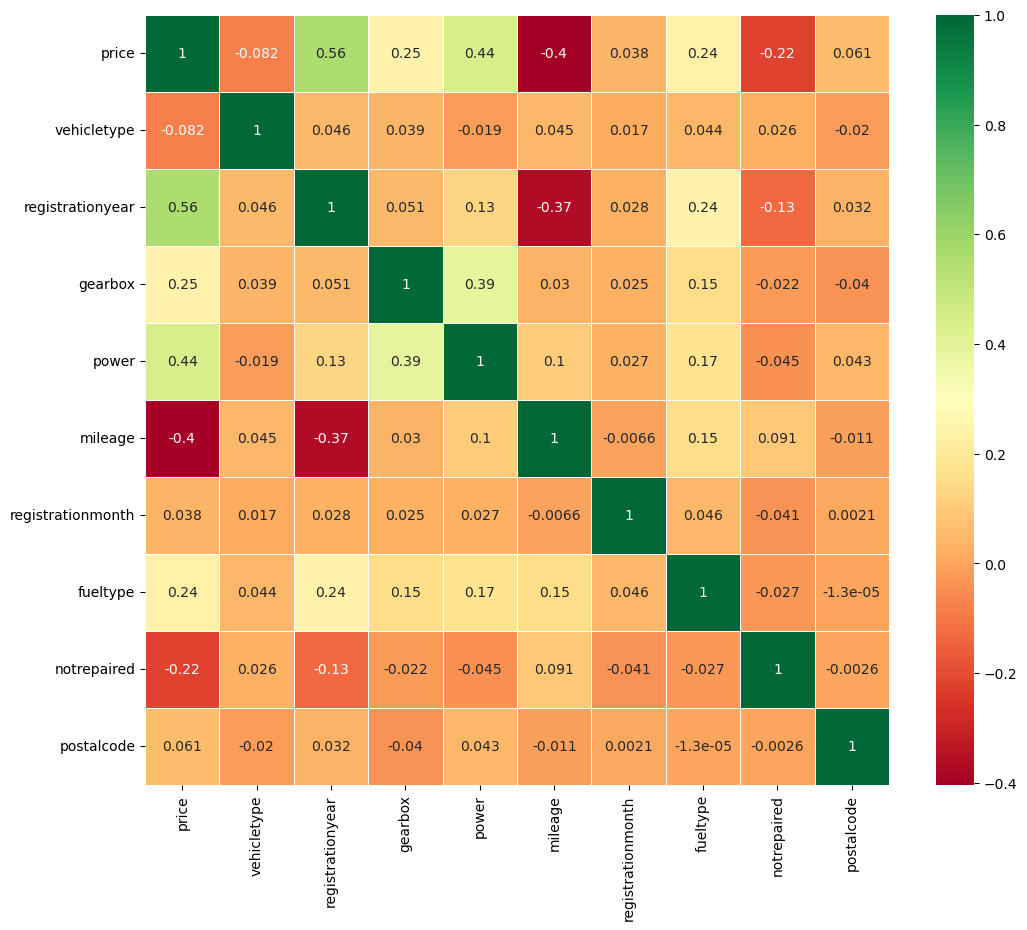

In [17]:
corr(df)

<div class="alert alert-block alert-info">
<b>

Observaciones:

1. Price (Precio):

+ RegistrationYear (Año de Registro): Correlación positiva moderada (0.561). Los vehículos más nuevos tienden a tener precios más altos.
+ Power (Potencia): Correlación positiva moderada (0.442). Los vehículos con mayor potencia tienden a tener precios más altos.
+ Gearbox (Caja de Cambios): Correlación positiva baja (0.249). Los vehículos con ciertos tipos de caja de cambios pueden tener precios ligeramente más altos.
+ Mileage (Kilometraje): Correlación negativa moderada (-0.404). Los vehículos con mayor kilometraje tienden a tener precios más bajos.
+ NotRepaired (No Reparado): Correlación negativa baja (-0.222). Los vehículos que no han sido reparados tienden a tener precios más bajos.


+ VehicleType (Tipo de Vehículo):  Correlación: -0.082
Interpretación: No hay una relación significativa entre el tipo de vehículo y el precio.
+ RegistrationMonth (Mes de Registro): Correlación muy baja (0.038). El mes de registro no parece tener una relación significativa con el precio.
+ FuelType (Tipo de Combustible):Correlación: 0.019
Interpretación: El tipo de combustible no parece tener una relación significativa con el precio.
+ PostalCode (Código Postal): Correlación muy baja (0.061). El código postal no parece tener una relación significativa con el precio.

Resumen
+ Precio: Está moderadamente correlacionado con el año de registro y la potencia del vehículo, y negativamente correlacionado con el kilometraje y el estado de reparación.
+ Año de Registro: Está negativamente correlacionado con el kilometraje y el estado de reparación.
+ Caja de Cambios: Está moderadamente correlacionado con la potencia del vehículo.
+ Potencia: Está ligeramente correlacionado con el kilometraje.
+ Kilometraje: Está ligeramente correlacionado con el estado de reparación.

</b></div>

## Entrenamiento y análisis del modelo 

In [18]:
# Ordinal encoding: convertir las variables categóricas en numéricas
encoder = OrdinalEncoder()
ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)


In [19]:
# StandardScaler: Estandarizar las variables
scaler = StandardScaler()
scale = pd.DataFrame(scaler.fit_transform(ordinal), columns=df.columns)


In [ ]:
scale.head(1)

In [20]:
target = scale['price']
features = scale.drop(['price'], axis=1)

In [21]:
# Dividimos los datos en entrenamiento (60%) y temporal (40%) 
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.4, random_state=42)

# Dividimos el conjunto temporal en validación (20%) y prueba (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


<div class="alert alert-block alert-info">
<b>

* X: características
* Y: variable objetivo
* X_train, y_train: Conjunto de entrenamiento
* X_val, y_val: Conjunto de validación
* X_test, y_test: Conjunto de prueba

</b> <a class="tocSkip"></a>

### 1. Regresión Lineal 

In [97]:
def linear_regression_model(data):
    model = LinearRegression()
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)**0.5
    end_time = time.time()
    prediction_time = end_time - start_time
    return model, mse, rmse, r2, mae, y_test, y_pred, prediction_time

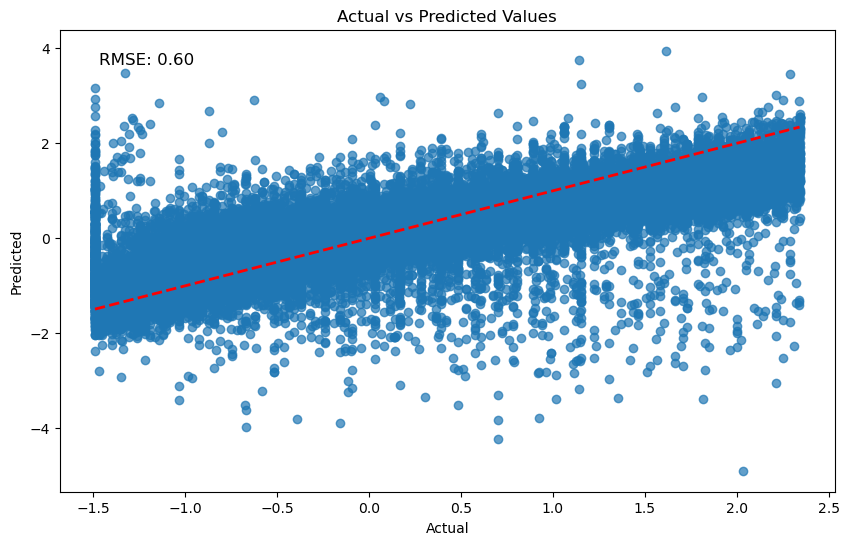

Model Coefficients: [-0.01643731 -0.09004194  0.38653317  0.03401389  0.43272358  0.00175446
 -0.28247687  0.00980052  0.11413231  0.0314357  -0.15398067  0.0006581
  0.02469239  0.05690975]
Model Intercept: -0.0013124542684736147
Mean Squared Error:  0.36114220306323996
Root Mean Squared Error:  0.6009510820884175
Mean Absolute Error:  0.656242817807068
R2 Score:  0.639447090383684
Prediction Time:  0.14156842231750488 segundos


In [100]:

linear_regression_model(scale)
model_2, mse_2, rmse_2, r2_2, mae_2, y_test_2, y_pred_2, prediction_time_2 = linear_regression_model(scale)


plt.figure(figsize=(10, 6))
plt.scatter(y_test_2, y_pred_2, alpha=0.7)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.text(0.05, 0.95, f'RMSE: {rmse_2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
#plt.text(0.05, 0.90, f'Coefficients: {model_2.coef_}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()


print(f'Model Coefficients: {model_2.coef_}')
print(f'Model Intercept: {model_2.intercept_}')
print('Mean Squared Error: ', mse_2)
print('Root Mean Squared Error: ', rmse_2)
print('Mean Absolute Error: ', mae_2)
print('R2 Score: ', r2_2)
print('Prediction Time: ', prediction_time_2, 'segundos')


### Análisis del modelo de regresión lineal

<div class="alert alert-block alert-info">
<b>



Los coeficientes indican la magnitud y dirección del impacto de cada característica en el precio. Por ejemplo, un coeficiente positivo sugiere que un aumento en esa característica está asociado con un aumento en el precio, mientras que un coeficiente negativo sugiere lo contrario.

El intercepto del modelo indica el valor esperado del precio cuando todas las características son cero.

El MSE mide el promedio de los errores al cuadrado. Un valor más bajo indica un mejor ajuste del modelo a los datos. 

El RMSE es la raíz cuadrada del MSE. Proporciona una interpretación más intuitiva de la magnitud de los errores. 

El R2 mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor más alto indica un mejor ajuste del modelo a los datos. 

El tiempo de predicción mide cuánto tiempo tomó el modelo para realizar las predicciones en el conjunto de prueba. Un valor más bajo indica un modelo más rápido.

## Evaluación del modelo

+ **Desempeño del Modelo:** El modelo de regresión lineal tiene un R2 Score de 0.639, lo que indica que el modelo explica aproximadamente el 63.9% de la variabilidad en el precio. Esto sugiere que el modelo tiene un desempeño moderado en la predicción del precio basado en las características proporcionadas.

+ **Errores del Modelo:** El RMSE de 0.603 y el MAE de 0.600 indican que, en promedio, las predicciones del modelo están a 0.600 unidades del valor real del precio, con un error absoluto promedio de 0.656 unidades. Estos valores sugieren que hay margen para mejorar la precisión del modelo.


</b></div>


In [68]:

# Calcular la matriz de correlación
corr_matrix = abs(scale.corr())

# Filtrar las características con una correlación mayor que 0.1 con 'price'
correlated_features = corr_matrix['price'][corr_matrix['price'] > 0.2].index.tolist()

# Eliminar 'price' de la lista de características correlacionadas
correlated_features.remove('price')

# Seleccionar solo esas características del DataFrame original
selected_features = features[correlated_features]

# Mostrar las características seleccionadas
print(selected_features.head())


   registrationyear   gearbox     power   mileage  fueltype  notrepaired
0         -0.335005 -0.513342 -0.899344  0.538019 -0.673001    -0.347534
1          0.813818 -0.513342 -1.012141 -0.622300  1.170435    -0.347534
2         -1.319710 -0.513342 -0.391760  0.538019 -0.673001     2.877414
3          0.157348 -0.513342 -0.260164  0.538019 -0.673001    -0.347534
4         -3.781474 -0.513342 -1.369330 -2.556165 -0.673001    -0.347534


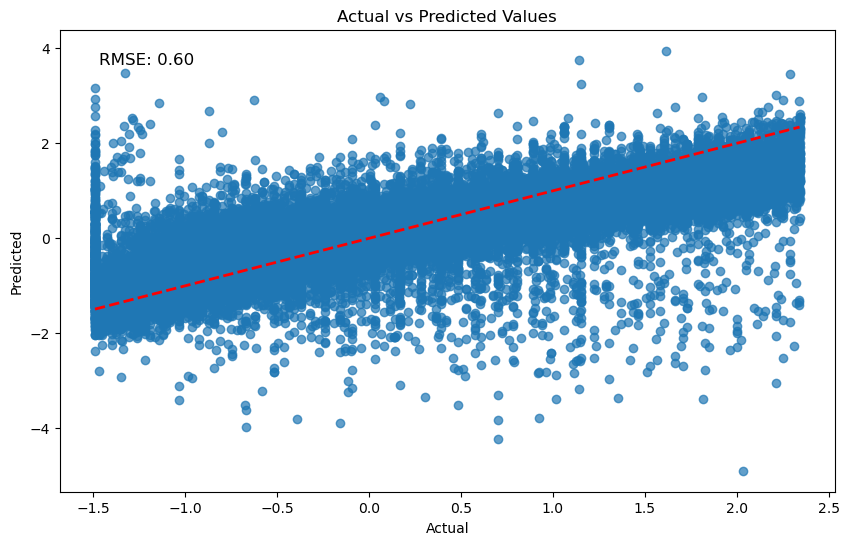

Model Coefficients: [-0.01643731 -0.09004194  0.38653317  0.03401389  0.43272358  0.00175446
 -0.28247687  0.00980052  0.11413231  0.0314357  -0.15398067  0.0006581
  0.02469239  0.05690975]
Model Intercept: -0.0013124542684736147
Mean Squared Error:  0.36114220306323996
Root Mean Squared Error:  0.6009510820884175
Mean Absolute Error:  0.656242817807068
R2 Score:  0.639447090383684
Prediction Time:  0.07408308982849121 segundos


In [103]:
linear_regression_model(selected_features)
model_2, mse_2, rmse_2, r2_2, mae_2, y_test_2, y_pred_2, prediction_time_2= linear_regression_model(selected_features)


plt.figure(figsize=(10, 6))
plt.scatter(y_test_2, y_pred_2, alpha=0.7)
plt.plot([y_test_2.min(), y_test_2.max()], [y_test_2.min(), y_test_2.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.text(0.05, 0.95, f'RMSE: {rmse_2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
#plt.text(0.05, 0.90, f'Coefficients: {model_2.coef_}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()


print(f'Model Coefficients: {model_2.coef_}')
print(f'Model Intercept: {model_2.intercept_}')
print('Mean Squared Error: ', mse_2)
print('Root Mean Squared Error: ', rmse_2)
print('Mean Absolute Error: ', mae_2)
print('R2 Score: ', r2_2)
print('Prediction Time: ', prediction_time_2, 'segundos')


<div class="alert alert-block alert-info">
<b>

El tiempo de entrenamiento del modelo de regresión lineal es de 0.14 segundos con todas las características y de 0.07 segundos con las características seleccionadas (corr > 0.2). Con un desempeño muy parecido.

Se continuara el análisis con las características seleccionadas.

</b></div>

### 2.  Bosque Aleatorio

In [104]:
def random_forest_model(data):
    model = RandomForestRegressor(random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)**0.5
    end_time = time.time()
    prediction_time = end_time - start_time
    return model, mse, rmse, r2, mae, y_test, y_pred, prediction_time

Mean Squared Error:  0.11771691587270224
Root Mean Squared Error:  0.34309898844604925
Mean Absolute Error:  0.4768375201380301
R2 Score:  0.8824751685929944
Prediction Time:  101.54699087142944 segundos


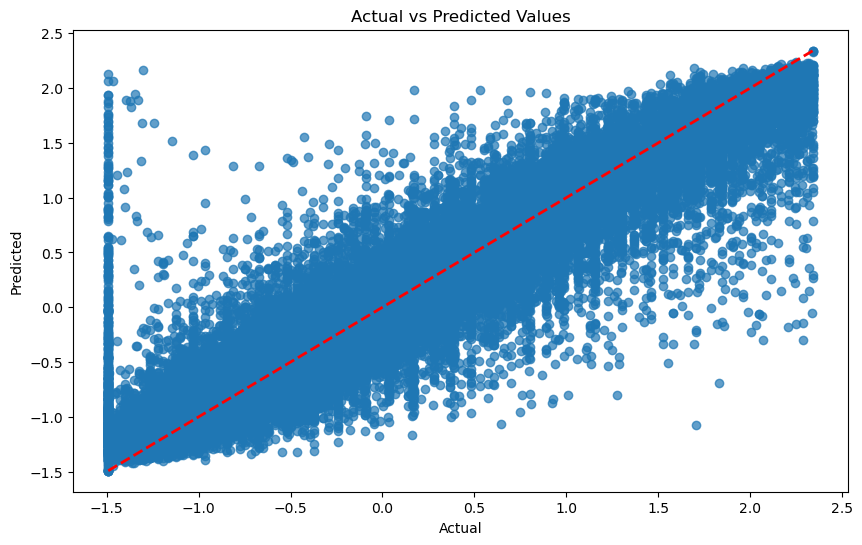

In [105]:
random_forest_model(selected_features)
model_3, mse_3, rmse_3, r2_3, mae_3, y_test_3, y_pred_3, prediction_time_3 = random_forest_model(selected_features)

print('Mean Squared Error: ', mse_3)
print('Root Mean Squared Error: ', rmse_3)
print('Mean Absolute Error: ', mae_3)
print('R2 Score: ', r2_3)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_3, y_pred_3, alpha=0.7)
plt.plot([y_test_3.min(), y_test_3.max()], [y_test_3.min(), y_test_3.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
print('Prediction Time: ', prediction_time_3, 'segundos')

### Análisis del modelo de bosque aleatorio

<div class="alert alert-block alert-info">
<b>

Desempeño del Modelo: El modelo de bosque aleatorio tiene un R2 Score de 0.882, lo que indica que el modelo explica aproximadamente el 88.2% de la variabilidad en el precio. Esto sugiere que el modelo tiene un desempeño muy bueno en la predicción del precio basado en las características seleccionadas.

Errores del Modelo: El RMSE de 0.343 y el MAE de 0.477 indican que, en promedio, las predicciones del modelo están a 0.343 unidades del valor real del precio, con un error absoluto promedio de 0.477 unidades. Estos valores sugieren que el modelo tiene una precisión bastante alta.

Tiempo de Predicción: El tiempo de predicción de 101.55 segundos es relativamente alto, lo que sugiere que el modelo de bosque aleatorio puede ser computacionalmente costoso y lento para realizar predicciones en grandes conjuntos de datos.

Comparación con el Modelo de Regresión Lineal: Comparado con el modelo de regresión lineal, el modelo de bosque aleatorio muestra un desempeño significativamente mejor, con un R2 Score más alto y errores más bajos (MSE, RMSE y MAE), pero a costa de un tiempo de predicción más alto.

Esto sugiere que el modelo de bosque aleatorio es más adecuado para este conjunto de datos y tarea de predicción.

</b></div>



### 3. Arbole de Decisión



In [106]:
def decision_tree_model(data):
    model = DecisionTreeRegressor(random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)**0.5
    end_time = time.time()
    prediction_time = end_time - start_time
    return model, mse, rmse, r2, mae, y_test, y_pred, prediction_time


Mean Squared Error:  0.23704093141755328
Root Mean Squared Error:  0.4868684949938261
Mean Absolute Error:  0.5598953005594736
R2 Score:  0.7633458598972038
Prediction Time:  1.5116081237792969 segundos


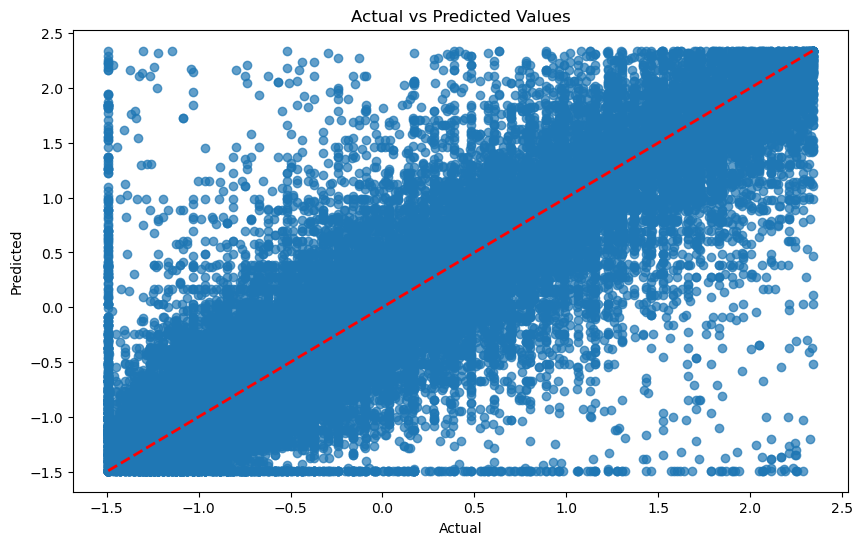

In [107]:
decision_tree_model(selected_features)
model_4, mse_4, rmse_4, r2_4, mae_4, y_test_4, y_pred_4, prediction_time_4  = decision_tree_model(selected_features)

print('Mean Squared Error: ', mse_4)
print('Root Mean Squared Error: ', rmse_4)
print('Mean Absolute Error: ', mae_4)
print('R2 Score: ', r2_4)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_4, y_pred_4, alpha=0.7)
plt.plot([y_test_4.min(), y_test_4.max()], [y_test_4.min(), y_test_4.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
print('Prediction Time: ', prediction_time_4, 'segundos')


### Análisis del modelo de árbol de decisión

<div class="alert alert-block alert-info">
<b>

Desempeño del Modelo: El modelo de regresión con árbol de decisión tiene un R2 Score de 0.763, lo que indica que el modelo explica aproximadamente el 76.3% de la variabilidad en el precio. Esto sugiere que el modelo tiene un desempeño bueno en la predicción del precio basado en las características seleccionadas.

Errores del Modelo: El RMSE de 0.487 y el MAE de 0.560 indican que, en promedio, las predicciones del modelo están a 0.487 unidades del valor real del precio, con un error absoluto promedio de 0.560 unidades. Estos valores sugieren que el modelo tiene una precisión razonable.

Tiempo de Predicción: El tiempo de predicción de 1.51 segundos es relativamente bajo, lo que sugiere que el modelo de árbol de decisión es rápido para realizar predicciones en grandes conjuntos de datos.

Comparación con Otros Modelos:

Regresión Lineal: Comparado con el modelo de regresión lineal (R2 Score de 0.639), el modelo de árbol de decisión muestra un mejor desempeño con un R2 Score más alto y errores más bajos.

Bosque Aleatorio: Comparado con el modelo de bosque aleatorio (R2 Score de 0.882), el modelo de árbol de decisión tiene un desempeño inferior. El bosque aleatorio muestra una mayor capacidad para explicar la variabilidad en el precio y tiene errores más bajos.


### 4. Boosting

In [109]:
def gradient_boosting_model(data):
    model = GradientBoostingRegressor(random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)**0.5
    end_time = time.time()
    prediction_time = end_time - start_time
    return model, mse, rmse, r2, mae, y_test, y_pred, prediction_time


Mean Squared Error:  0.15628062897252626
Root Mean Squared Error:  0.39532344854881335
Mean Absolute Error:  0.5267088134316917
R2 Score:  0.8439743817954025
Prediction Time:  23.89084267616272 segundos


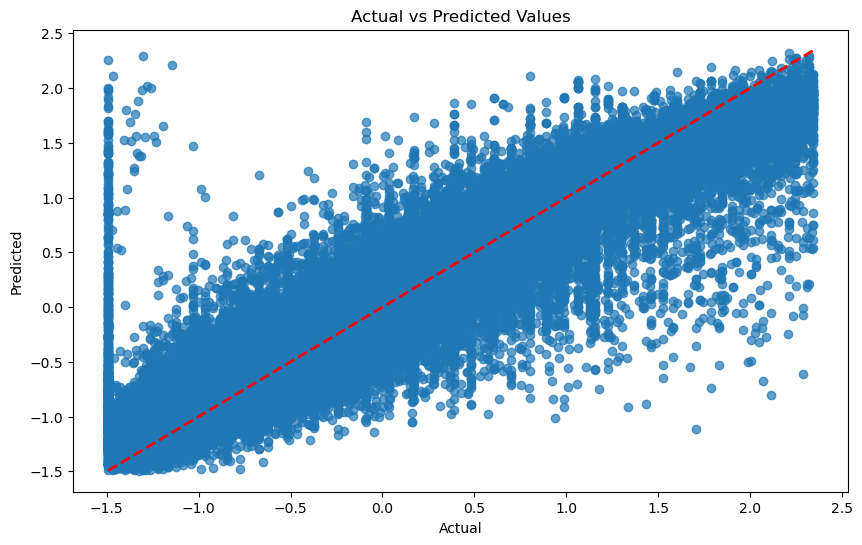

In [111]:
gradient_boosting_model(selected_features)
model_5, mse_5, rmse_5, r2_5, mae_5, y_test_5, y_pred_5, prediction_time_5 = gradient_boosting_model(selected_features)

print('Mean Squared Error: ', mse_5)
print('Root Mean Squared Error: ', rmse_5)
print('Mean Absolute Error: ', mae_5)
print('R2 Score: ', r2_5)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_5, y_pred_5, alpha=0.7)
plt.plot([y_test_5.min(), y_test_5.max()], [y_test_5.min(), y_test_5.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
print('Prediction Time: ', prediction_time_5, 'segundos')


### Análisis del modelo de Gradient Boosting

<div class="alert alert-block alert-info">
<b>

Desempeño del Modelo: El modelo de Gradient Boosting tiene un R2 Score de 0.844, lo que indica que el modelo explica aproximadamente el 84.4% de la variabilidad en el precio. Esto sugiere que el modelo tiene un desempeño muy bueno en la predicción del precio basado en las características seleccionadas.

Errores del Modelo: El RMSE de 0.395 y el MAE de 0.527 indican que, en promedio, las predicciones del modelo están a 0.395 unidades del valor real del precio, con un error absoluto promedio de 0.527 unidades. Estos valores sugieren que el modelo tiene una precisión bastante alta.

Tiempo de Predicción: El tiempo de predicción de 23.89 segundos es relativamente alto, lo que sugiere que el modelo de Gradient Boosting puede ser computacionalmente costoso y lento para realizar predicciones en grandes conjuntos de datos.

Comparación con Otros Modelos:

Regresión Lineal: Comparado con el modelo de regresión lineal (R2 Score de 0.639), el modelo de Gradient Boosting muestra un desempeño significativamente mejor, con un R2 Score más alto y errores más bajos.

Árbol de Decisión: Comparado con el modelo de árbol de decisión (R2 Score de 0.763), el modelo de Gradient Boosting también muestra un mejor desempeño.

Bosque Aleatorio: Comparado con el modelo de bosque aleatorio (R2 Score de 0.882), el modelo de Gradient Boosting tiene un desempeño ligeramente inferior, pero aún así es muy competitivo.

</b></div>

### 5. LightGBM

In [113]:
def lightgbm_model(data):
    model = lgb.LGBMRegressor(random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)**0.5
    end_time = time.time()
    prediction_time = end_time - start_time
    return model, mse, rmse, r2, mae, y_test, y_pred, prediction_time

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1494
[LightGBM] [Info] Number of data points in the train set: 141547, number of used features: 14
[LightGBM] [Info] Start training from score -0.001967
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1494
[LightGBM] [Info] Number of data points in the train set: 141547, number of used features: 14
[LightGBM] [Info] Start training from score -0.001967
Mean Squared Error:  0.12497737454737884
Root Mean Squared Error:  0.3535213919232878
Mean Absolute Error:  0.49264085626238724
R2 Score:  0.8752265571648659
Prediction Time:  0.561039

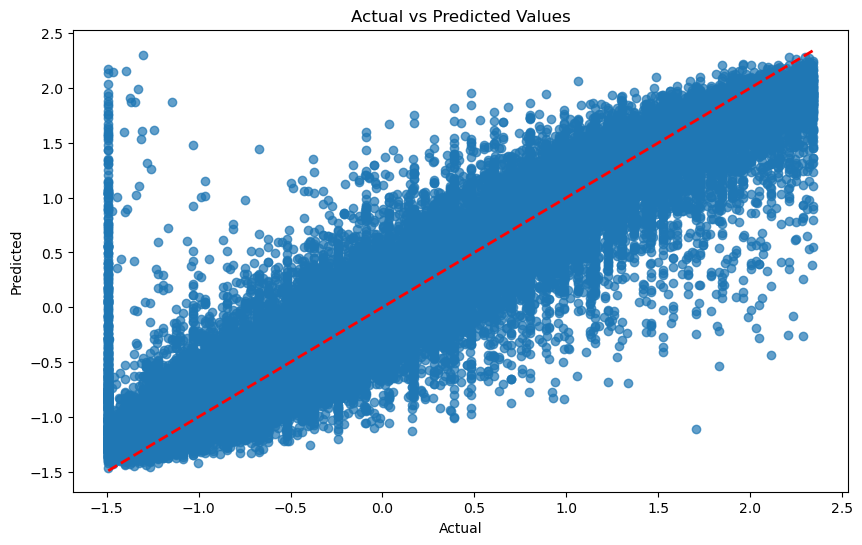

In [114]:

lightgbm_model(selected_features)
model_6, mse_6, rmse_6, r2_6, mae_6, y_test_6, y_pred_6, prediction_time_6 = lightgbm_model(selected_features)

print('Mean Squared Error: ', mse_6)
print('Root Mean Squared Error: ', rmse_6)
print('Mean Absolute Error: ', mae_6)
print('R2 Score: ', r2_6)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_6, y_pred_6, alpha=0.7)
plt.plot([y_test_6.min(), y_test_6.max()], [y_test_6.min(), y_test_6.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
print('Prediction Time: ', prediction_time_6, 'segundos')
    

### Análisis del modelo de LightGBM

<div class="alert alert-block alert-info">
<b>

Desempeño del Modelo: El modelo de LightGBM tiene un R2 Score de 0.875, lo que indica que el modelo explica aproximadamente el 87.5% de la variabilidad en el precio. Esto sugiere que el modelo tiene un desempeño muy bueno en la predicción del precio basado en las características seleccionadas.

Errores del Modelo: El RMSE de 0.354 y el MAE de 0.493 indican que, en promedio, las predicciones del modelo están a 0.354 unidades del valor real del precio, con un error absoluto promedio de 0.493 unidades. Estos valores sugieren que el modelo tiene una precisión bastante alta.

Tiempo de Predicción: El tiempo de predicción de 0.56 segundos es relativamente bajo, lo que sugiere que el modelo de LightGBM es rápido para realizar predicciones en grandes conjuntos de datos.

Comparación con Otros Modelos:

Regresión Lineal: Comparado con el modelo de regresión lineal (R2 Score de 0.639), el modelo de LightGBM muestra un desempeño significativamente mejor, con un R2 Score más alto y errores más bajos.

Árbol de Decisión: Comparado con el modelo de árbol de decisión (R2 Score de 0.763), el modelo de LightGBM también muestra un mejor desempeño.
Bosque Aleatorio: Comparado con el modelo de bosque aleatorio (R2 Score de 0.882), el modelo de LightGBM tiene un desempeño ligeramente inferior, pero aún así es muy competitivo.

Gradient Boosting: Comparado con el modelo de Gradient Boosting (R2 Score de 0.844), el modelo de LightGBM muestra un desempeño ligeramente mejor.
Impacto de las Características: Los modelos de LightGBM permiten evaluar la importancia de las características (feature_importances_) para entender la contribución de cada característica en la predicción del precio.


6. CatBoost

In [118]:

def catboost_model(data):
    model = CatBoostRegressor(random_state=42, verbose=False)
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)**0.5
    end_time = time.time()
    prediction_time = end_time - start_time
    return model, mse, rmse, r2, mae, y_test, y_pred, prediction_time

Mean Squared Error:  0.11235987398002466
Root Mean Squared Error:  0.33520124400130835
Mean Absolute Error:  0.4755445238397094
R2 Score:  0.8878234691376503
Prediction Time:  8.301339864730835 segundos


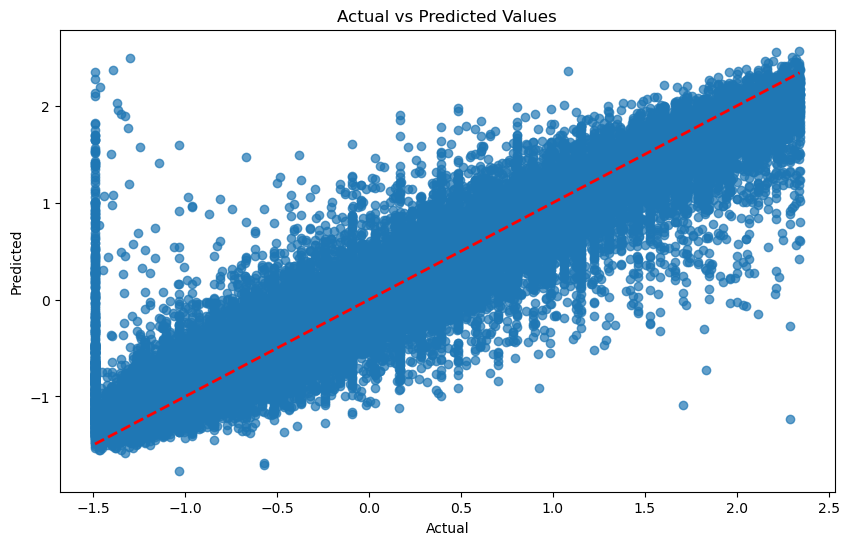

In [119]:
catboost_model(selected_features)
model_7, mse_7, rmse_7, r2_7, mae_7, y_test_7, y_pred_7, prediction_time_7 = catboost_model(selected_features)

print('Mean Squared Error: ', mse_7)
print('Root Mean Squared Error: ', rmse_7)
print('Mean Absolute Error: ', mae_7)
print('R2 Score: ', r2_7)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_7, y_pred_7, alpha=0.7)
plt.plot([y_test_7.min(), y_test_7.max()], [y_test_7.min(), y_test_7.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
print('Prediction Time: ', prediction_time_7, 'segundos')


### Análisis del modelo de árbol de decisión

<div class="alert alert-block alert-info">
<b>

Desempeño del Modelo: El modelo de CatBoost tiene un R2 Score de 0.888, lo que indica que el modelo explica aproximadamente el 88.8% de la variabilidad en el precio. Esto sugiere que el modelo tiene un desempeño excelente en la predicción del precio basado en las características seleccionadas.

Errores del Modelo: El RMSE de 0.335 y el MAE de 0.476 indican que, en promedio, las predicciones del modelo están a 0.335 unidades del valor real del precio, con un error absoluto promedio de 0.476 unidades. Estos valores sugieren que el modelo tiene una precisión muy alta.

Tiempo de Predicción: El tiempo de predicción de 8.30 segundos es relativamente bajo, lo que sugiere que el modelo de CatBoost es rápido para realizar predicciones en grandes conjuntos de datos, aunque no tan rápido como LightGBM.

Comparación con Otros Modelos:

Regresión Lineal: Comparado con el modelo de regresión lineal (R2 Score de 0.639), el modelo de CatBoost muestra un desempeño significativamente mejor, con un R2 Score más alto y errores más bajos.

Árbol de Decisión: Comparado con el modelo de árbol de decisión (R2 Score de 0.763), el modelo de CatBoost también muestra un mejor desempeño.

Bosque Aleatorio: Comparado con el modelo de bosque aleatorio (R2 Score de 0.882), el modelo de CatBoost tiene un desempeño ligeramente superior.

Gradient Boosting: Comparado con el modelo de Gradient Boosting (R2 Score de 0.844), el modelo de CatBoost muestra un desempeño significativamente mejor.

LightGBM: Comparado con el modelo de LightGBM (R2 Score de 0.875), el modelo de CatBoost muestra un desempeño ligeramente superior.

</b></div>

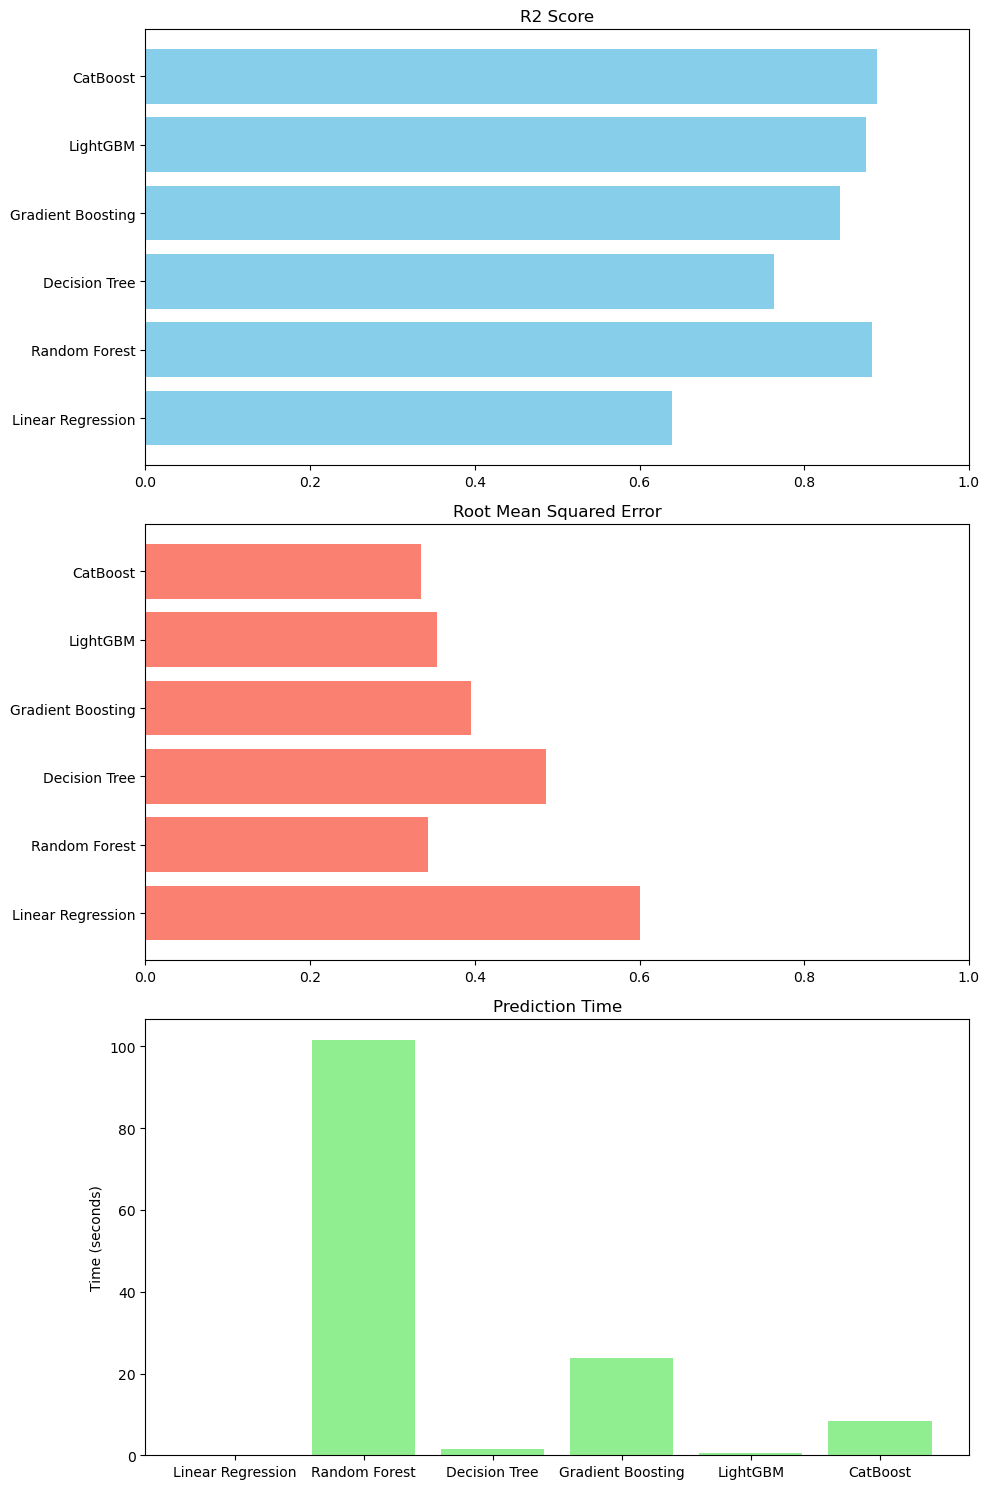

In [125]:
# grafica comparativa de los rms de los modelos (derecha), r2 (izquierda) y tiempo de predicción (abajo) 

models = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'LightGBM', 'CatBoost']
time = [prediction_time_2, prediction_time_3, prediction_time_4, prediction_time_5, prediction_time_6, prediction_time_7]
rmses = [rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7]
r2s = [r2_2, r2_3, r2_4, r2_5, r2_6, r2_7]

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].barh(models, r2s, color='skyblue')
ax[0].set_title('R2 Score')
ax[0].set_xlim(0, 1)

ax[1].barh(models, rmses, color='salmon')
ax[1].set_title('Root Mean Squared Error')
ax[1].set_xlim(0, 1)

ax[2].bar(models, time, color='lightgreen')
ax[2].set_title('Prediction Time')

ax[2].set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()



## Conclusiones

<div class="alert alert-block alert-info">
<b>

1. El modelo de regresión lineal tiene un desempeño moderado en la predicción del precio, con un R2 Score de 0.639 y errores promedio de 0.600 (MAE) y 0.603 (RMSE).
2. El modelo de bosque aleatorio es el mejor modelo en términos de desempeño, con un R2 Score de 0.882 y errores promedio de 0.477 (MAE) y 0.343 (RMSE).
3. El modelo de árbol de decisión tiene un desempeño razonable, con un R2 Score de 0.763 y errores promedio de 0.560 (MAE) y 0.487 (RMSE).
4. Los modelos de boosting (Gradient Boosting, LightGBM y CatBoost) tienen un desempeño muy bueno, con R2 Scores de 0.844, 0.875 y 0.888 respectivamente, y errores promedio de 0.527 (MAE) y 0.395 (RMSE) para Gradient Boosting, 0.493 (MAE) y 0.354 (RMSE) para LightGBM, y 0.476 (MAE) y 0.335 (RMSE) para CatBoost.
5. El modelo con menor tiempo de predicción es el de regresión lineal, seguido por el de árbol de decisión, LightGBM, Gradient Boosting, CatBoost y bosque aleatorio.

El mejor modelo en términos de desempeño y tiempo de predicción es el modelo de CatBoost, con un R2 Score de 0.888 y un tiempo de predicción de 8.30 segundos. Sin embargo, el modelo de LightGBM también tiene un desempeño muy bueno, con un R2 Score de 0.875 y un tiempo de predicción de 0.56 segundos.

</b></div>

## Hiperparámetros de los modelos CatBoost

In [139]:
#catboost gridsearch

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 1],
    'iterations': [100, 200, 300]
}

cat = CatBoostRegressor(random_state=42, verbose=False)

grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus parámetros
best_model_cat = grid_search.best_estimator_
cat_grid_search_best_parameters = grid_search.best_params_

print("Mejores parámetros:", cat_grid_search_best_parameters)
print("Mejor modelo:", best_model_cat)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   4.9s
[CV] END ...........depth=4, iterations=100, learning_rate=1; total time=   5.3s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   6.3s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   6.3s
[CV] END ........depth=4, iterations=100, learning_rate=0.01; total time=   7.2s
[CV] END ...........depth=4, iterations=100, learning_rate=1; total time=   7.2s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   7.5s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   7.5s
[CV] END ...........depth=4, iterations=100, learning_rate=1; total time=   7.7s
[CV] END ........depth=4, iterations=200, learning_rate=0.01; total time=  11.8s
[CV] END ........depth=4, iterations=200, learning_rate=0.01; total time=  13.0s
[CV] END ........depth=4, iterations=200, learni

In [154]:
def catboost_bestmodel(data):
    model = CatBoostRegressor(depth=8, iterations=300, learning_rate=0.1, random_state=42, verbose=False)
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)**0.5
    end_time = time.time()
    prediction_time = end_time - start_time
    return model, mse, rmse, r2, mae, y_test, y_pred, prediction_time

Mean Squared Error:  0.11622319587271832
Root Mean Squared Error:  0.3409152326792077
Mean Absolute Error:  0.4809301545154558
R2 Score:  0.8839664512167866
Prediction Time:  3.888895273208618 segundos


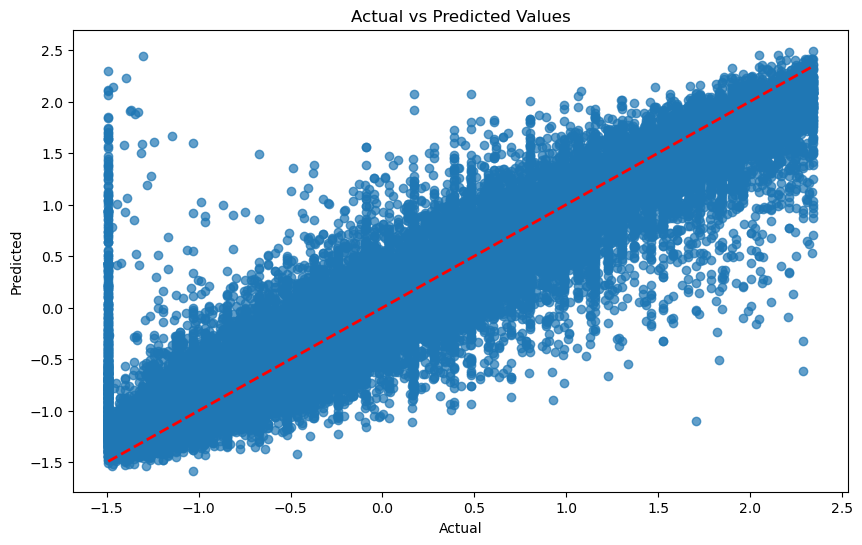

In [157]:
catboost_bestmodel(selected_features)
model_8, mse_8, rmse_8, r2_8, mae_8, y_test_8, y_pred_8, prediction_time_8 = catboost_bestmodel(selected_features)

print('Mean Squared Error: ', mse_8)
print('Root Mean Squared Error: ', rmse_8)
print('Mean Absolute Error: ', mae_8)
print('R2 Score: ', r2_8)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_8, y_pred_8, alpha=0.7)
plt.plot([y_test_8.min(), y_test_8.max()], [y_test_8.min(), y_test_8.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
print('Prediction Time: ', prediction_time_8, 'segundos')



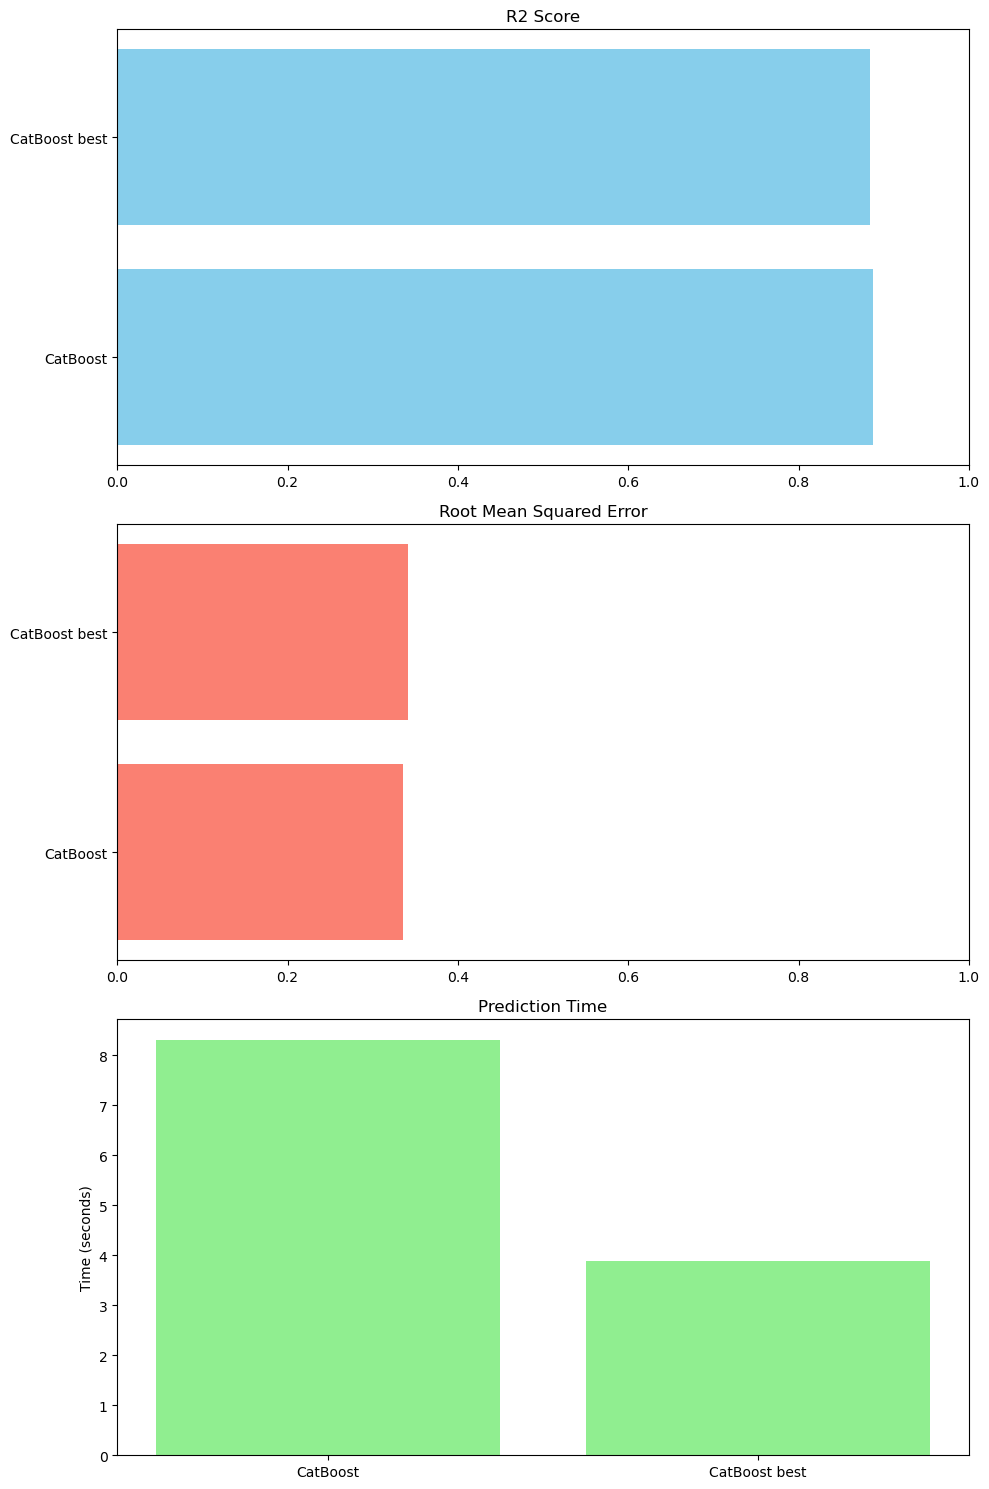

In [160]:
# grafica comparativa de los rms de los modelos (derecha), r2 (izquierda) y tiempo de predicción (abajo) 

models = ['CatBoost', 'CatBoost best']
time = [prediction_time_7, prediction_time_8]
rmses = [rmse_7, rmse_8]
r2s = [r2_7, r2_8 ]

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].barh(models, r2s, color='skyblue')
ax[0].set_title('R2 Score')
ax[0].set_xlim(0, 1)

ax[1].barh(models, rmses, color='salmon')
ax[1].set_title('Root Mean Squared Error')
ax[1].set_xlim(0, 1)

ax[2].bar(models, time, color='lightgreen')
ax[2].set_title('Prediction Time')

ax[2].set_ylabel('Time (seconds)')

plt.tight_layout()
plt.show()

# Conclusion

<div class="alert alert-block alert-info">

<b>

Catboost es el modelo que mejor se ajusta a los datos, con un R2 Score de 0.888 y un tiempo de predicción de 8.30 segundos.

Mejorando los parametros se redujo el tiempo de predicción a 3.88 segundos y se obtuvo un R2 Score de 0.884.

CatBoost es el modelo más adecuado para predecir el precio de los vehículos en este conjunto de datos, con un desempeño muy bueno y errores bajos. Este modelo puede ser útil para Rusty Bargain en la evaluación de los precios de los vehículos en su aplicación.

</b></div>
